# Importations

In [1]:
# import sys
MOD_DIR = '/Users/louis/cours_v_guigue/game-learning'

# if MOD_DIR not in sys.path:
#     sys.path.append(MOD_DIR)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import random
import seaborn as sns

from sklearn import datasets
from sklearn import svm, naive_bayes
from sklearn import tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC , SVR
from sklearn.metrics import r2_score

In [3]:
from mod.wine_regression import *

## Directory

In [4]:
INPUT_DIR = "./data/winequality_data.csv"

# Importation des données et regression pré-liminaire

In [5]:
data = pd.read_csv(INPUT_DIR)
data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
X = data.loc[:, data.columns!="quality"]
y = data["quality"]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Entraîner un modèle de régression linéaire non-normalisé
mod_non_norm = LinearRegression()
scores = cross_val_score(mod_non_norm, X_train, y_train, cv=10)
print("Score sans normalisation des données :", scores.mean())

Score sans normalisation des données : 0.3230213163533245


## Prétraitement du modèle

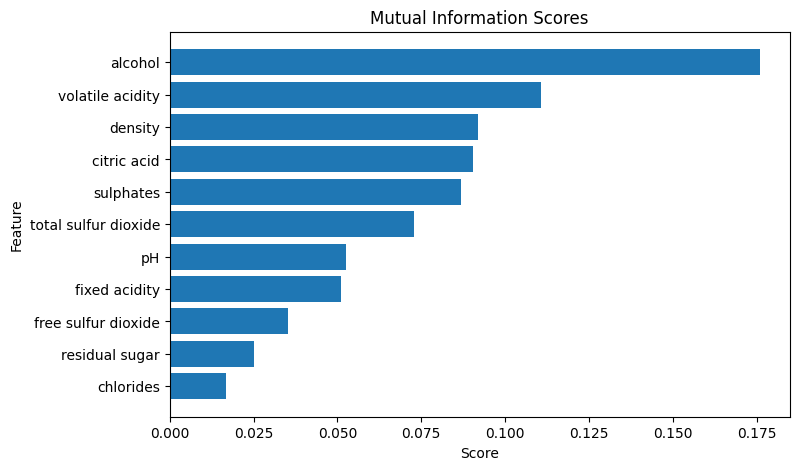

In [12]:
mi_scores = mutual_info_scores(X, y)

plt.figure(dpi=100, figsize=(8, 5))
plt.xlabel("Score")
plt.ylabel("Feature")
plot_utility_scores(mi_scores)

Nous pouvons voir sur le graphique ci-dessus que l'alcool explique majoritairement la qualité du vin.

Nous remarquons au contraire plusieurs caractéristiques (fixed_acidity, chlorides, residual sugar, free sulfur dioxide et pH) dont le score d'information mutuelle est inférieur à 0.05.Nous allons donc nous affranchir de ces informatons qui semblent moins significatives pour la prédiction.

In [13]:
X = X.drop(["free sulfur dioxide","residual sugar","pH","fixed acidity","chlorides"], axis = 1)
X.head()

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol
0,0.70,0.00,34.0,0.9978,0.56,9.4
1,0.88,0.00,67.0,0.9968,0.68,9.8
2,0.76,0.04,54.0,0.9970,0.65,9.8
3,0.28,0.56,60.0,0.9980,0.58,9.8
4,0.70,0.00,34.0,0.9978,0.56,9.4


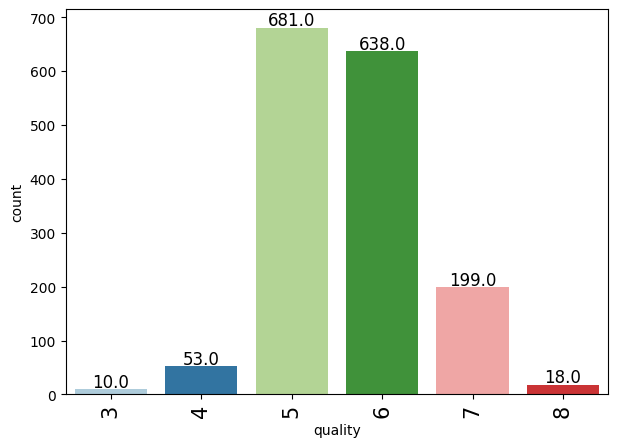

In [14]:
labeled_barplot(data, "quality")

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
print(f'Training data:\n{X_train[0:5]}\nTest data:\n{X_test[0:5]}')

Training data:
     volatile acidity  citric acid  total sulfur dioxide  density  sulphates  \
493             0.690         0.31                  81.0  1.00020       0.74   
354             0.210         0.40                 165.0  0.99120       0.59   
342             0.390         0.47                  14.0  0.99820       0.75   
834             0.685         0.26                  23.0  0.99694       0.47   
705             1.035         0.15                  54.0  0.99900       0.49   

     alcohol  
493     11.6  
354     11.9  
342      9.8  
834      9.4  
705      9.9  
Test data:
      volatile acidity  citric acid  total sulfur dioxide  density  sulphates  \
803               0.56         0.08                  46.0   0.9971       0.66   
124               0.50         0.17                 102.0   0.9960       0.48   
350               0.67         0.22                  34.0   1.0004       0.98   
682               0.46         0.31                  58.0   0.9980       0.54  

In [17]:
# Entraîner un modèle de régression linéaire non-normalisé
mod_non_norm = LinearRegression()
scores = cross_val_score(mod_non_norm, X_train, y_train, cv=10)
print("Score sans normalisation des données :", scores.mean())

Score sans normalisation des données : 0.3146567508795052


In [18]:
# Entraîner un modèle de régression linéaire avec normalisation des données
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)

mod_norm = LinearRegression()
scores_norm = cross_val_score(mod_norm, X_train_norm, y_train, cv=10)
print("Score avec normalisation des données :", scores_norm.mean())


Score avec normalisation des données : 0.31465675087950484


> <span style="color:magenta"> Nous nous attendions à ce que le modèle 1 soit meilleur que le 2 car... </span>

In [19]:
X_test_norm = scaler.fit_transform(X_test)

In [20]:
print(f'Training data:\n{X_train_norm[0:5]}\nTest data:\n{X_test_norm[0:5]}')

Training data:
[[0.39041096 0.31       0.26501767 0.74375918 0.22699387 0.49230769]
 [0.06164384 0.4        0.56183746 0.08296623 0.13496933 0.53846154]
 [0.18493151 0.47       0.02826855 0.5969163  0.23312883 0.21538462]
 [0.3869863  0.26       0.06007067 0.50440529 0.06134969 0.15384615]
 [0.62671233 0.15       0.16961131 0.65565345 0.07361963 0.23076923]]
Test data:
[[0.44221106 0.10126582 0.14391144 0.51012146 0.32038835 0.21428571]
 [0.38190955 0.21518987 0.35055351 0.42105263 0.14563107 0.19642857]
 [0.55276382 0.27848101 0.099631   0.77732794 0.63106796 0.26785714]
 [0.34170854 0.39240506 0.18819188 0.58299595 0.2038835  0.25      ]
 [0.34170854 0.30379747 0.099631   0.32388664 0.26213592 0.39285714]]


In [21]:
y_train_norm = y_train.astype('float32').to_numpy().astype(np.float32)
y_test_norm = y_test.astype('float32').to_numpy().astype(np.float32)

In [22]:
mod_norm = LinearRegression()
scores_norm = cross_val_score(mod_norm, X_train_norm, y_train_norm, cv=10)
print("Score avec normalisation des données :", scores_norm.mean())

Score avec normalisation des données : 0.3146567507013642


## On crée un modèle de regression linéaire à la main pour optimiser les paramètres

In [133]:
lr = 0.01
num_epochs = 20
batch_size = 10

In [134]:
num_examples = len( X_train)
indices = list(range(num_examples))
random.shuffle(indices)

In [135]:
for X, y in generator_batch(batch_size, X_train_norm, y_train_norm):
    print(X,'\n',X.shape[0], '\n', y)
    break

[[0.30821918 0.27       0.11042945 0.15384615]
 [0.0890411  0.37       0.26380368 0.61538462]
 [0.12328767 0.34       0.28834356 0.50769231]
 [0.17808219 0.44       0.16564417 0.46153846]
 [0.20547945 0.66       0.23312883 0.50769231]
 [0.23972603 0.27       0.26380368 0.43076923]
 [0.2739726  0.45       0.2392638  0.46153846]
 [0.32191781 0.31       0.1595092  0.27692308]
 [0.30136986 0.49       0.30674847 0.38461538]
 [0.28767123 0.13       0.14723926 0.15384615]] 
 10 
 [5. 7. 7. 6. 7. 5. 6. 6. 5. 5.]


In [136]:
w,b =  initialize_params(X_train_norm)
epoch_list = []
cost_list = []
loss_array = np.empty((0, 2), np.float32)
for epoch in range(num_epochs):
    for X, y in generator_batch(batch_size, X_train_norm, y_train_norm):
             w,b = mbgd(X, y,[w,b], X.shape[0], lr)
    train_cost = mean_squared_loss(linear_regression(X_train_norm, w, b), y_train_norm)
    epoch_list.append(epoch+1)
    cost_list.append(train_cost)
    print(f'learning rate = {lr}, epoch = {epoch + 1}, training cost = {float(train_cost):f}')

learning rate = 0.01, epoch = 1, training cost = 0.450466
learning rate = 0.01, epoch = 2, training cost = 0.376036
learning rate = 0.01, epoch = 3, training cost = 0.368631
learning rate = 0.01, epoch = 4, training cost = 0.362162
learning rate = 0.01, epoch = 5, training cost = 0.355871
learning rate = 0.01, epoch = 6, training cost = 0.350556
learning rate = 0.01, epoch = 7, training cost = 0.345342
learning rate = 0.01, epoch = 8, training cost = 0.340800
learning rate = 0.01, epoch = 9, training cost = 0.336479
learning rate = 0.01, epoch = 10, training cost = 0.332581
learning rate = 0.01, epoch = 11, training cost = 0.329104
learning rate = 0.01, epoch = 12, training cost = 0.325774
learning rate = 0.01, epoch = 13, training cost = 0.322789
learning rate = 0.01, epoch = 14, training cost = 0.320178
learning rate = 0.01, epoch = 15, training cost = 0.317592
learning rate = 0.01, epoch = 16, training cost = 0.315339
learning rate = 0.01, epoch = 17, training cost = 0.313599
learni

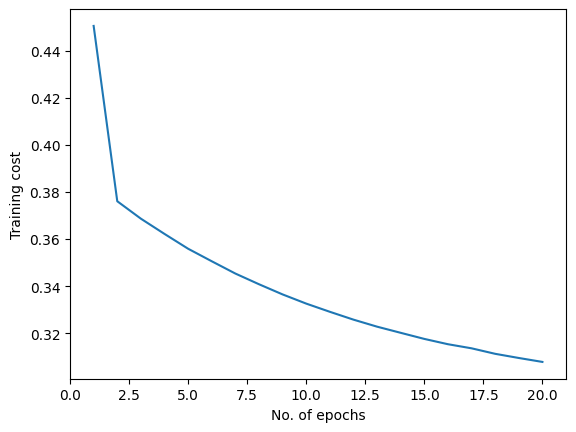

In [137]:
plt.plot(epoch_list,cost_list)
plt.xlabel("No. of epochs")
plt.ylabel("Training cost")
plt.xlim(0,21)
plt.show()

In [138]:
y_test_pred= linear_regression(X_test_norm,w,b)
ss_res =0
ss_tot =0
for i in range(len(y_test_pred)):
    ss_res += (y_test_norm[i] - y_test_pred[i])**2
    ss_tot += (y_test_norm[i]- np.mean(y_test_norm))**2
print(ss_res,ss_tot)

[336.14562454] 209.12187500001164


In [139]:
y_test_pred = linear_regression(X_test_norm,w,b)
y_train_pred = linear_regression(X_train_norm,w,b)
test_MSE  = r2_score(y_test_norm,y_test_pred)
train_MSE = r2_score(y_train_norm,y_train_pred)
print(f'Test error is {test_MSE}\nTrain error is {train_MSE}')

Test error is -0.6074149229716235
Train error is 0.05371558630550255


In [140]:
print(w)
print(b)    

[[2.0558498]
 [1.7709146]
 [1.8517305]
 [1.8030537]]
[3.649829]


In [141]:
mod_norm = LinearRegression()
mod_norm.fit(X_train_norm, y_train_norm)
scores_norm = cross_val_score(mod_norm, X_train_norm, y_train_norm, cv=10)
print("Score avec normalisation des données :", scores_norm.mean())

Score avec normalisation des données : 0.3081693119551785


In [142]:
print(mod_norm.coef_)
print(mod_norm.intercept_)

[-1.74002035 -0.06150289  1.03387743  2.01876006]
5.319250077260373


## REGRESSION SVR

In [156]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred_test = svr.predict(X_test)
r2 = r2_score(y_test, y_pred_test)
print("R²:", r2)

R²: 0.3150827965831816


In [157]:
param = {
    'C'     :[0.1,0.5,0.9,1,1.2,1.5],
    'kernel':['linear', 'poly', 'rbf'],
    'gamma' :[0.1,0.8,1,1.1,1.4]
}
SVM_GridSearchCV = GridSearchCV(svr, param_grid=param, scoring='neg_mean_squared_error', cv=5)
SVM_GridSearchCV.fit(X_train_norm,y_train_norm)
SVM_GridSearchCV.best_params_

{'C': 1.5, 'gamma': 1.4, 'kernel': 'rbf'}

In [155]:
svr = SVR(C=1.5,gamma =1.4, kernel="rbf")
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

R²: 0.36935518499944053


### REGRESSION AVEC UN RANDOM FOREST

In [151]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

R²: 0.19022218493311782


In [149]:
param = {
              'n_estimators': [50, 100, 150,200],
              'max_depth': [5, 10, 15],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]
            }
#SVM_GridSearchCV = GridSearchCV(rf, param_grid=param, scoring='r2', cv=40)
#SVM_GridSearchCV.fit(X_train_norm,y_train_norm)
#SVM_GridSearchCV.best_params_

# output
#{'max_depth': 15,
# 'min_samples_leaf': 1,
# 'min_samples_split': 2,
# 'n_estimators': 150}

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [153]:
rf = RandomForestRegressor( max_depth =  15 ,min_samples_split= 2, n_estimators=  150, min_samples_leaf= 1 )
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

R²: 0.45797692985800553


En comparant le R² du modèle Random forest, du modèle SVM et de la régréssion linéaire, on peut conclure à des résultats assez décevant des modèles pour faire une regression des données. 
On peut maintenant tester plusieurs modèles en classification mutliclasse pour voir si l'étiquette de nos données se prette mieux à ce genre de prédiction. 

## Classification multiclasse

In [100]:
print(data.quality.value_counts())
y_classif = data.quality.values
type(y_classif)
X_classif = data.drop(["free sulfur dioxide","residual sugar","pH","volatile acidity","density","total sulfur dioxide","quality","chlorides"], axis = 1)
print(X_classif)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64
      fixed acidity  citric acid  sulphates  alcohol
0               7.4         0.00       0.56      9.4
1               7.8         0.00       0.68      9.8
2               7.8         0.04       0.65      9.8
3              11.2         0.56       0.58      9.8
4               7.4         0.00       0.56      9.4
...             ...          ...        ...      ...
1594            6.2         0.08       0.58     10.5
1595            5.9         0.10       0.76     11.2
1596            6.3         0.13       0.75     11.0
1597            5.9         0.12       0.71     10.2
1598            6.0         0.47       0.66     11.0

[1599 rows x 4 columns]


In [101]:
X_train_classif,X_test_classif,y_train_classif,y_test_classif = train_test_split(X_classif,y_classif,test_size=0.2,random_state=1)

## SVM

In [102]:
SVM = SVC(random_state=1)
SVM.fit(X_train_classif,y_train_classif)
predictions = SVM.predict(X_test_classif)
score = round(accuracy_score(y_test_classif,predictions),5)
print("Support Vector Machine Score {}".format(score))

Support Vector Machine Score 0.60625


In [ ]:
param = {
    'C'     :[0.1,0.5,0.9,1,1.5,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
#SVM_GridSearchCV = GridSearchCV(SVM, param_grid=param, scoring='accuracy', cv=40)
#SVM_GridSearchCV.fit(X_train_classif,y_train_classif)
#SVM_GridSearchCV.best_params_

In [104]:
SVM_BestGridSearchCV1 = SVC(C = 1.5, gamma = 1.3, kernel = 'rbf')
SVM_BestGridSearchCV1.fit(X_train_classif,y_train_classif)
predictions = SVM_BestGridSearchCV1.predict(X_test_classif)
score = round(accuracy_score(y_test_classif,predictions),5)
print("Support Vector Machine Grid Search CV Score {}".format(score))

Support Vector Machine Grid Search CV Score 0.625


### RANDOM FOREST

In [106]:
rf_classif= RandomForestClassifier()
rf_classif.fit(X_train_classif,y_train_classif)
predictions = rf_classif.predict(X_test_classif)
score = round(accuracy_score(y_test_classif,predictions),5)
print("Random Forest Score {}".format(score))

Random Forest Score 0.65312


In [108]:
from sklearn.model_selection import GridSearchCV
param = {
              'n_estimators': [50, 100, 150,200],
              'max_depth': [5, 10, 15],
              'min_samples_split': [2, 5, 10]
}
#SVM_GridSearchCV = GridSearchCV(rf_classif, param_grid=param, scoring='accuracy', cv=40)
#SVM_GridSearchCV.fit(X_train_classif,y_train_classif)
#SVM_GridSearchCV.best_params_

/Users/louis/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=40.
  warnings.warn(


{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 200}

In [109]:
rf_classif= RandomForestClassifier( max_depth =  15 ,min_samples_split= 5, n_estimators=  200)
rf_classif.fit(X_train_classif,y_train_classif)
predictions = rf_classif.predict(X_test_classif)
score = round(accuracy_score(y_test_classif,predictions),5)
print("Random Forest Score {}".format(score))

Random Forest Score 0.6625
